In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from src.VideoReader import VideoReader
from src.Video import Video
from src.histograms import compute_histograms
from src import preprocess as prep
import cv2
import os
from src.cvtools import ipynb_show_cv2_image
import random
import src.preprocess as prep

In [101]:
def find(target_histograms : np.ndarray, videos, histMetric):    
    # 2D array, an array for each video containing the distance per segement
    distances = []
    for video in videos:
        # Array to store the distance per segment
        segment_dist = []       
        for segment in video.segments:
            dist = 0
            # per channel
            for i, h in enumerate(segment.histograms[0]):
                # Method kiezen, voor nu intersection
                # Compare the full image histogram
                dist += cv2.compareHist(target_histograms[0][i], h, histMetric)
            segment_dist.append(dist)
        distances.append(segment_dist)
    
    # Compute top 5 segments -with the lowest distance- for each video
    best_dist_indices = []
    for d in distances:
        best_dist_indices.append(np.argpartition(d, -5)[-5:])
    
    sub_distances = []
    i = 0
    for video in videos:
        segment_dist = []       
        for segment_index in best_dist_indices[i]:
            segment = video.segments[segment_index]
            dist = 0
            for j, grid_hists in enumerate(segment.histograms): 
                for k, channel_hist in enumerate(grid_hists):
                    dist += cv2.compareHist(target_histograms[j][k], channel_hist, histMetric)
            segment_dist.append(dist)    
            
        sub_distances.append(segment_dist)
        i = i + 1

    # Find index of maximum value in matrix
    result = np.where(sub_distances == np.amax(sub_distances))
        
    match_vid = result[0][0]
    match_seg = best_dist_indices[result[0][0]][result[1][0]]
    
#     matched_frame = list_frames[videos[match_vid].segments[match_seg].frame_start]
#     ipynb_show_cv2_image(matched_frame, 'matched_frame')
    
#     display('expected vid {} frame {} - found vid {:05d}, frame {}'.format(vid, target_frame_nr, match_vid +1, videos[match_vid].segments[match_seg].frame_start))

    print('video {:05d} - segment {}'.format(match_vid+1, match_seg))

    return videos[match_vid].segments[match_seg]

In [107]:
vids = prep.load_training_set(range(1, 5))
vids_list = list(vids)

In [110]:
# cv::HistCompMethods { 
#   cv::HISTCMP_CORREL = 0, 
#   cv::HISTCMP_CHISQR = 1, 
#   cv::HISTCMP_INTERSECT = 2, 
#   cv::HISTCMP_BHATTACHARYYA = 3, 
#   cv::HISTCMP_HELLINGER = HISTCMP_BHATTACHARYYA, 
#   cv::HISTCMP_CHISQR_ALT = 4, 
#   cv::HISTCMP_KL_DIV = 5 
# }

for i in range(1,40):
    find(vids_list[0].segments[i].histograms, vids_list, cv2.HISTCMP_CORREL)

video 00001 - segment 1
video 00001 - segment 2
video 00001 - segment 3
video 00001 - segment 4
video 00001 - segment 5
video 00001 - segment 6
video 00001 - segment 7
video 00001 - segment 8
video 00001 - segment 9
video 00001 - segment 10
video 00001 - segment 11
video 00001 - segment 12
video 00001 - segment 13
video 00001 - segment 14
video 00001 - segment 15
video 00001 - segment 16
video 00001 - segment 17
video 00001 - segment 18
video 00001 - segment 19
video 00001 - segment 20
video 00001 - segment 21
video 00001 - segment 22
video 00001 - segment 23
video 00001 - segment 24
video 00001 - segment 25
video 00001 - segment 26
video 00001 - segment 27
video 00001 - segment 28
video 00001 - segment 29
video 00001 - segment 30
video 00001 - segment 31
video 00001 - segment 32
video 00001 - segment 33
video 00001 - segment 34
video 00001 - segment 35
video 00001 - segment 36
video 00001 - segment 37
video 00001 - segment 38
video 00001 - segment 39


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


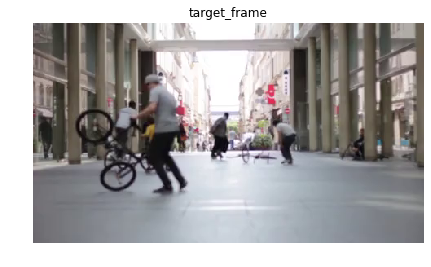

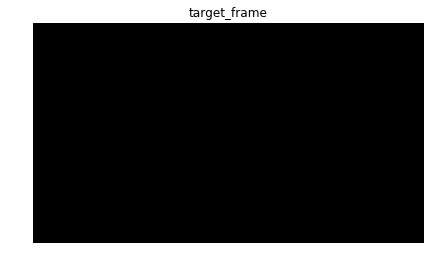

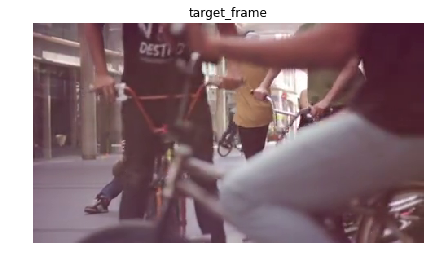

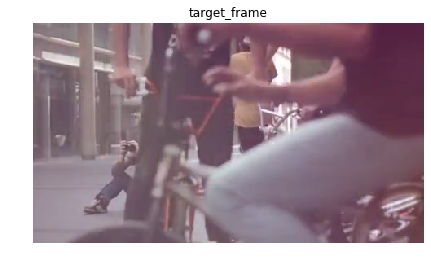

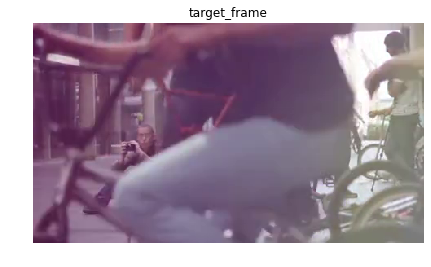

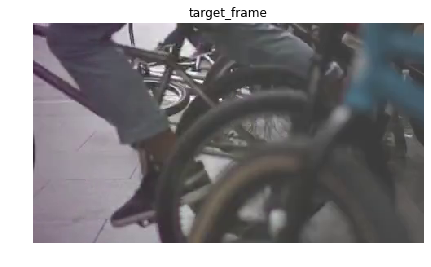

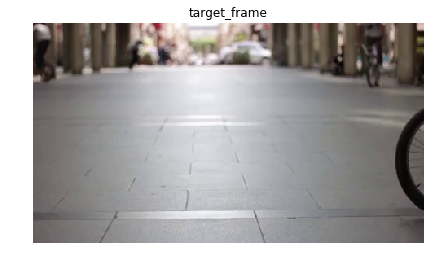

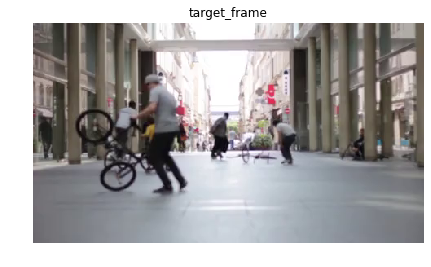

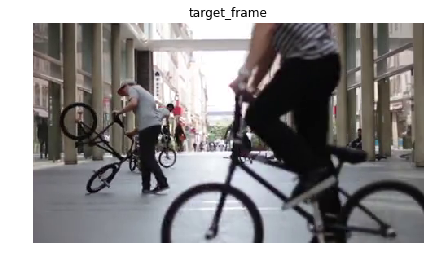

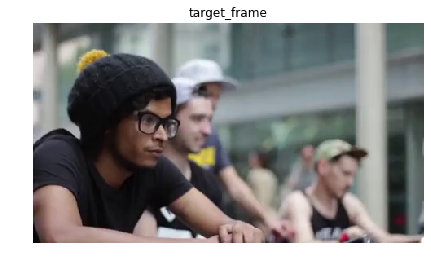

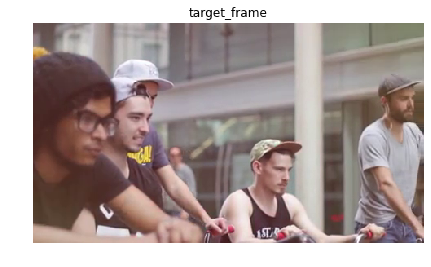

In [53]:
video_path = os.path.join(r'data/movies/00001.mp4')
target_video = VideoReader()
target_video.open(video_path)
frames = target_video.get_frames()
    
list_frames = list(frames)

def histBySeg(segid):
    target_frame_nr = vids_list[0].segments[segid].frame_start
#     target_frame_nr = random.randint(1, len(list_frames))

    target_frame = list_frames[target_frame_nr]
    ipynb_show_cv2_image(target_frame, 'target_frame')

    # Compute the histograms of the full and sub-frames.
    return compute_histograms(target_frame)

s2 = histBySeg(6)

x0 = []
x1 = []
for i in range(10):
    s = histBySeg(i)
    d0 = cv2.compareHist(s2[0][0], s[0][0], cv2.HISTCMP_CORREL)
    d1 = cv2.compareHist(s2[0][1], s[0][2], cv2.HISTCMP_CORREL)

    x0.append(d0)
    x1.append(d1)
    
print(x0)
print(x1)